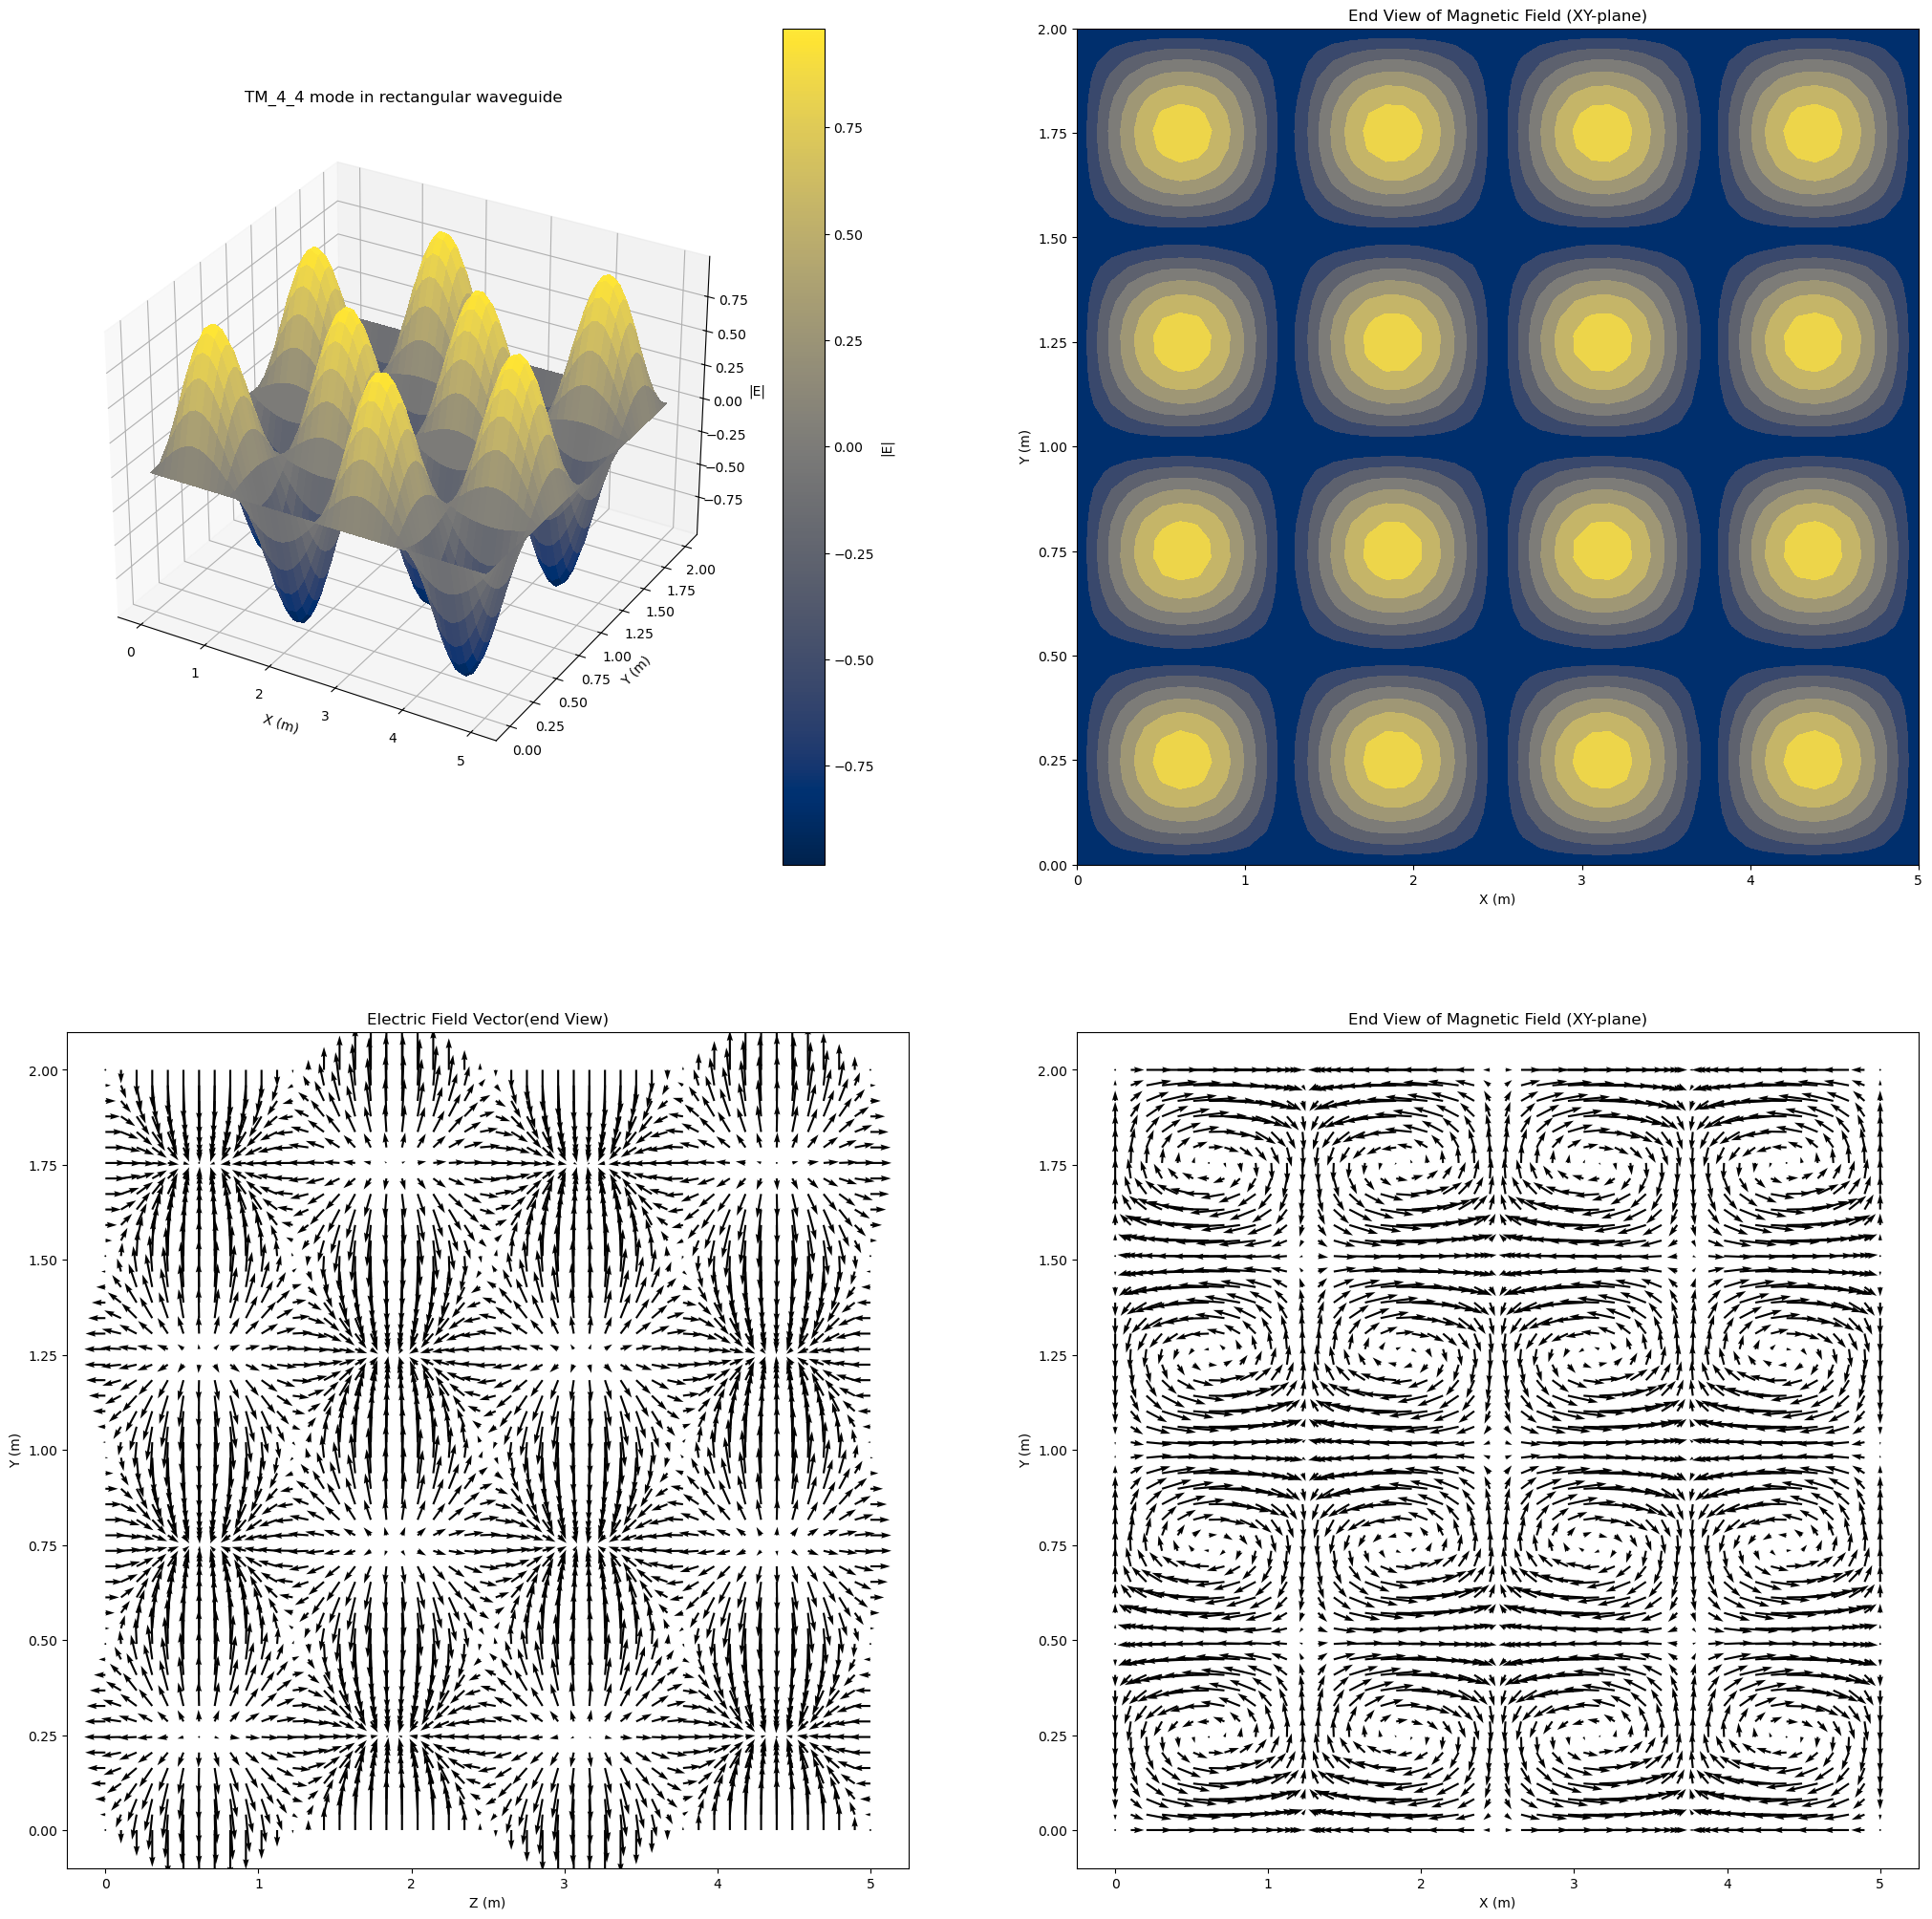

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import cm

# Parameters

a = 5  # Waveguide width
b = 2  # Waveguide height
c=10 #depth
m, n = 4,4  # TM_mn mode (change for other modes)
f = 10e9  # Frequency (Hz)
epsilon = 8.854e-12  # Permittivity
mu = 4e-7 * np.pi  # Permeability

# Calculate angular frequency and wave number
omega = 2 * np.pi * f
k = omega * np.sqrt(mu * epsilon)

# Characteristic equation and solve for beta
def char_eqn(beta):
    return k**2 -(np.pi * m / a)**2 - (np.pi * n / b)**2 -beta**2

beta = fsolve(char_eqn, 0)[0]

A= 1

# Define field expressions for Ez
def Ez(x, y,z):
    return np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(-1j * beta * z)
def Ex(x, y,z):
    return -A*(m * np.pi  / a)* np.cos(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(-1j * beta * z)
def Ey(x, y,z):
    return -A*(n * np.pi / b)* np.sin(m * np.pi * x / a) * np.cos(n * np.pi * y / b) * np.exp(-1j * beta * z)
def Mx(x, y,z):
    return A*(n * np.pi / b)* np.sin(m * np.pi * x / a) * np.cos(n * np.pi * y / b) * np.exp(-1j * beta * z)
def My(x, y,z):
    return -A*(m * np.pi  / a)* np.cos(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(-1j * beta * z)

# Generate grid points
Nx, Ny = 50, 50
x = np.linspace(0, a, Nx)
y = np.linspace(0, b, Ny)
z = np.linspace(0, c, Ny)
X, Y, Z = np.meshgrid(x, y,z)

# Calculate electric field magnitude at grid points
e_z = Ez(X, Y,Z)
e_x = Ex(X, Y,Z)
e_y = Ey(X, Y,Z)
m_x = Mx(X,Y,Z)
m_y = My(X,Y,Z)

# Create 3D surface plot
fig = plt.figure(figsize=(25, 25))

# Add surface plot
ax_surface = fig.add_subplot(221, projection='3d')
surf = ax_surface.plot_surface(X[:,:,0], Y[:,:,0], e_z[:,:,0], cmap=cm.cividis, rstride=1, cstride=1, linewidth=0, antialiased=False)
ax_surface.set_xlabel('X (m)')
ax_surface.set_ylabel('Y (m)')
ax_surface.set_zlabel('|E|')
ax_surface.set_title('TM_{}_{} mode in rectangular waveguide'.format(m, n))
plt.colorbar(surf, label='|E|')

####################################
ax_end = fig.add_subplot(222)
ax_end.contourf(X[:,:,0], Y[:,:,0], np.abs(e_z[:,:,0]), cmap=cm.cividis)
ax_end.set_xlabel('X (m)')
ax_end.set_ylabel('Y (m)')
ax_end.set_title('End View of Magnetic Field (XY-plane)')

# Add quiver plot
ax_quiver = fig.add_subplot(223)
ax_quiver.quiver(X[:,:,0], Y[:,:,0], e_x[:,:,0], e_y[:,:,0], scale=100, color='black')
ax_quiver.set_xlabel('Z (m)')
ax_quiver.set_ylabel('Y (m)')
ax_quiver.set_title('Electric Field Vector(end View)')

# 3D surface plot for Hz
ax = fig.add_subplot(224)
ax.quiver(X[:,:,0], Y[:,:,0], m_x[:,:,0], m_y[:,:,0], scale=100, color='black')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('End View of Magnetic Field (XY-plane)')


plt.show()


C:\Users\abinj\AppData\Local\Temp\ipykernel_7508\3264279800.py:33: RuntimeWarning: overflow encountered in exp
  return np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_7508\3264279800.py:33: RuntimeWarning: invalid value encountered in multiply
  return np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_7508\3264279800.py:39: RuntimeWarning: overflow encountered in exp
  return (1j*omega*epsilon/H)*np.sin(m * np.pi * x / a) * np.cos(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_7508\3264279800.py:39: RuntimeWarning: invalid value encountered in multiply
  return (1j*omega*epsilon/H)*np.sin(m * np.pi * x / a) * np.cos(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_7508\3264279800.py:41: RuntimeWarning: overflow encountered in exp

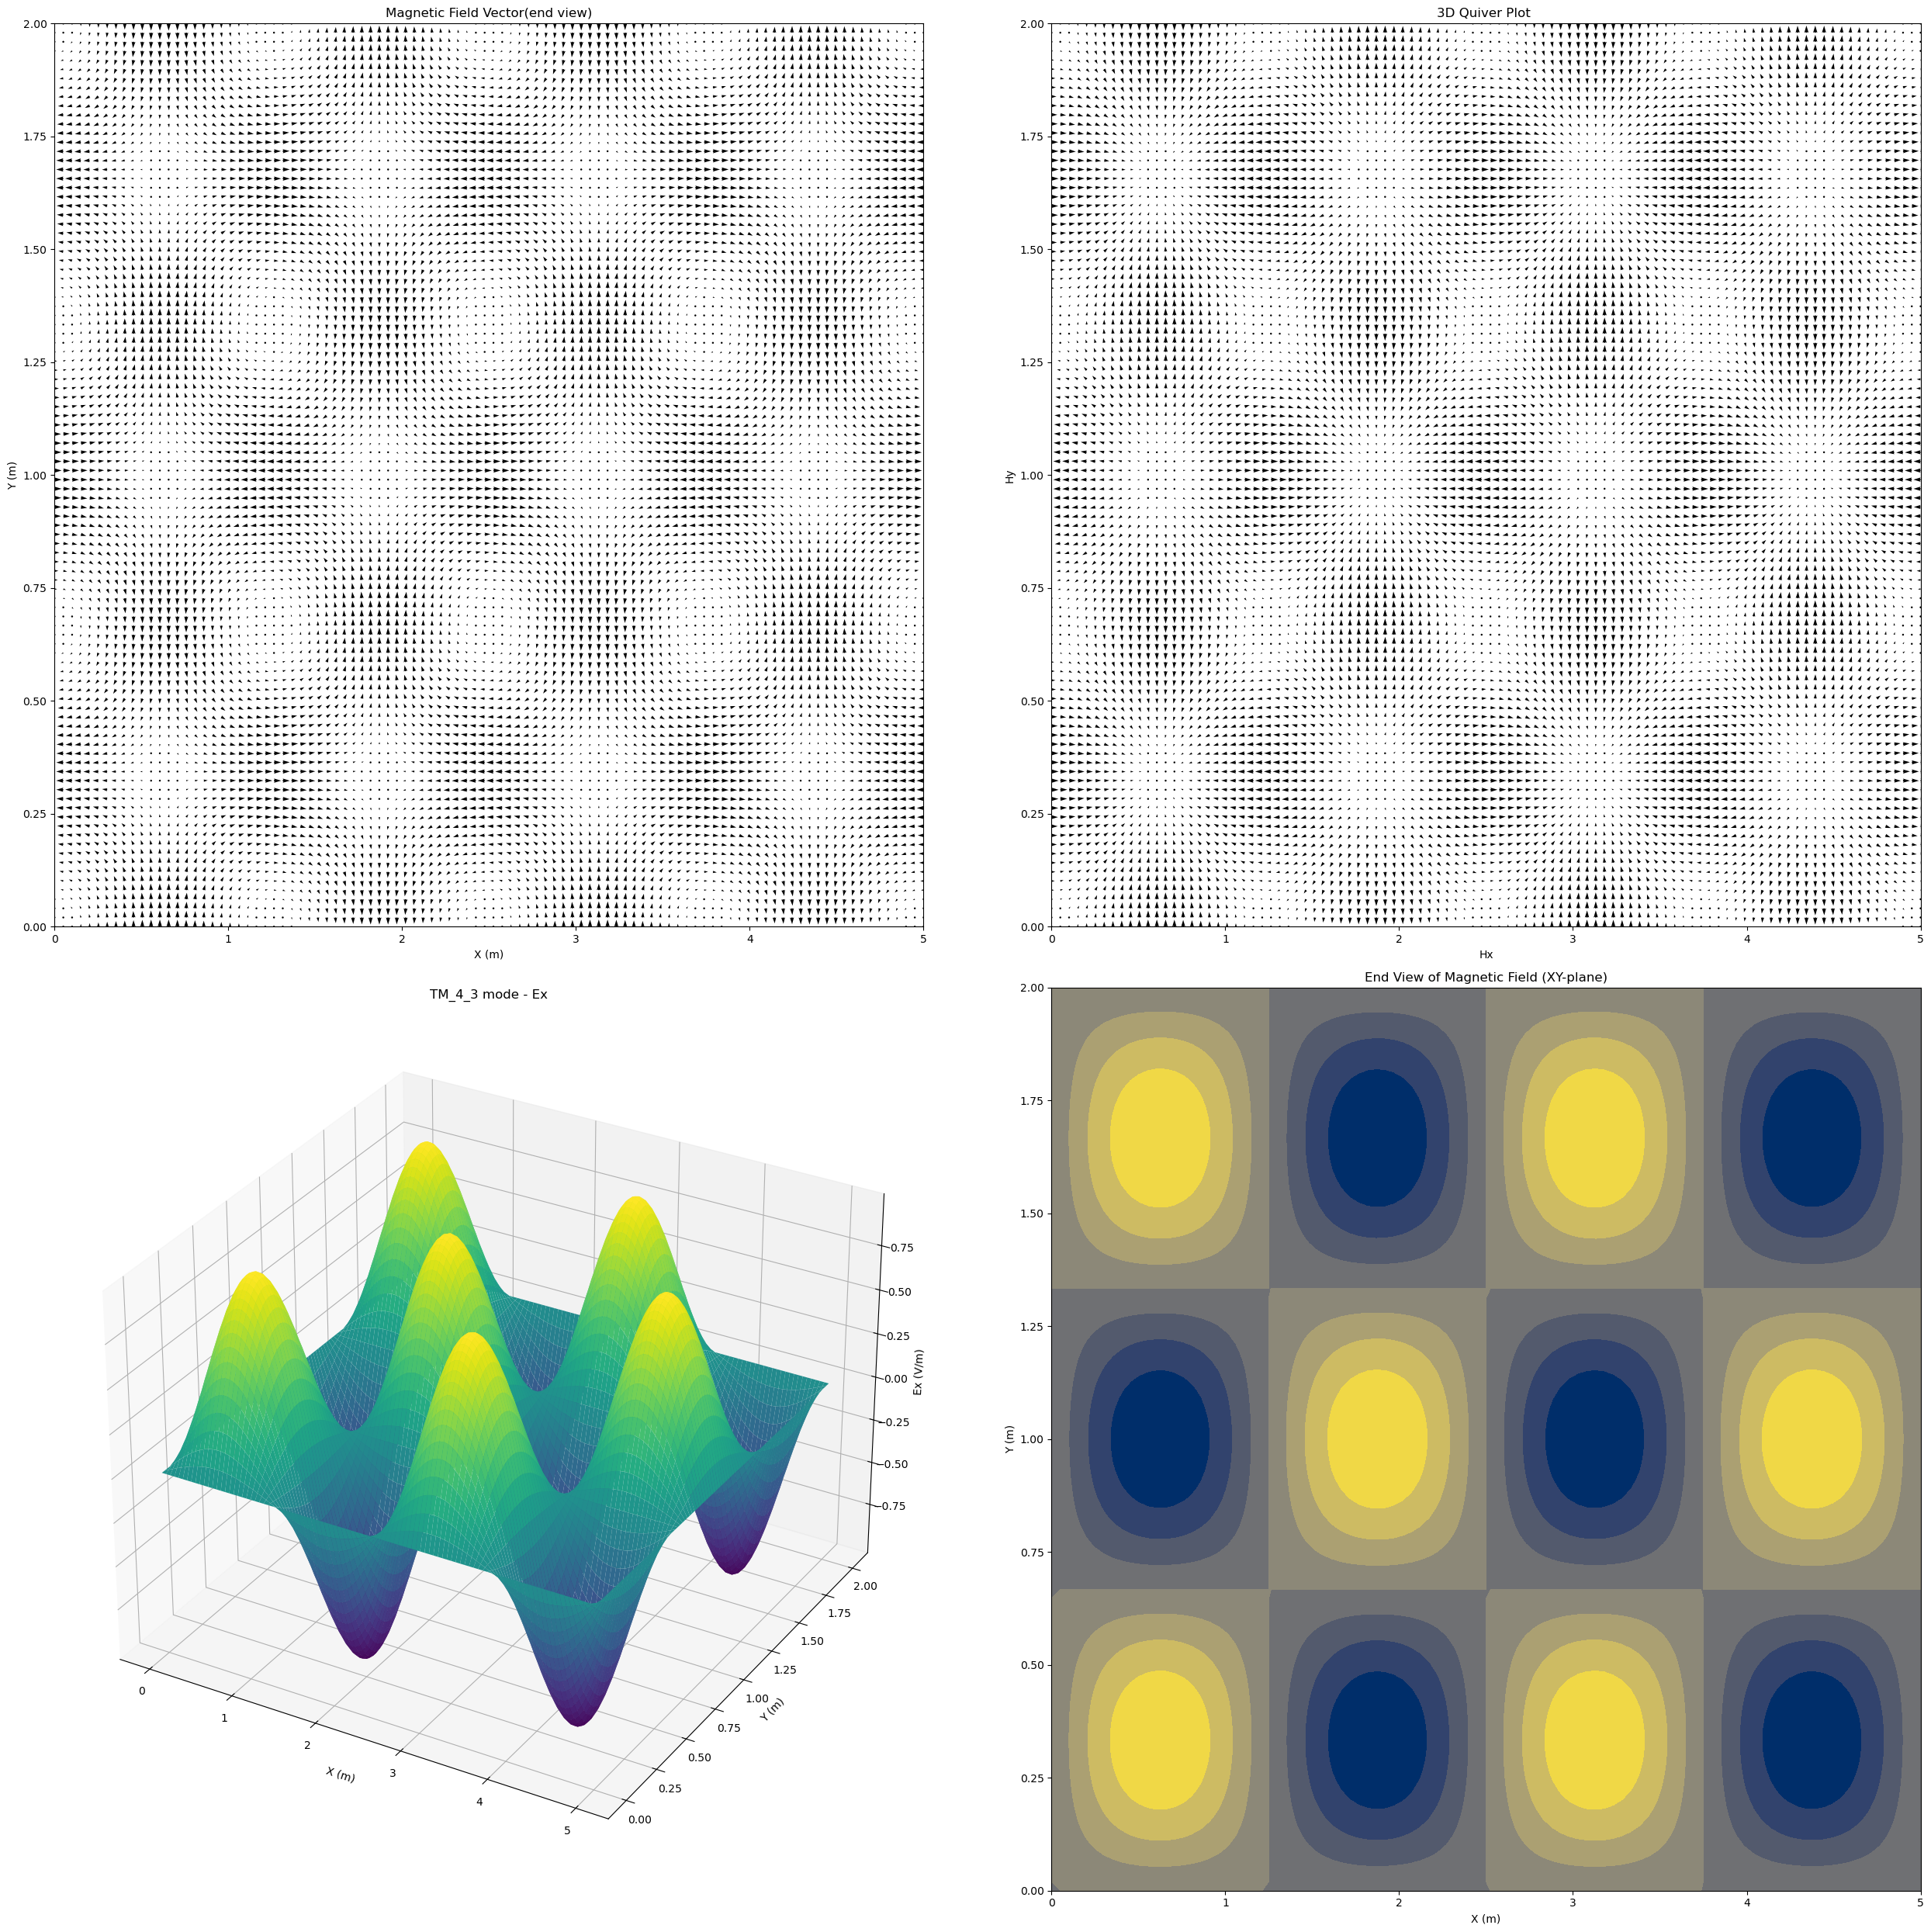

In [7]:
#####TM#############

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# Parameters
a = 5  # Waveguide width
b = 2  # Waveguide height
c= 10 #depth
m, n = 4, 3  # TM_mn mode (change for other modes)
f = 10e9  # Frequency (Hz)
epsilon = 8.854e-12  # Permittivity
mu = 4e-7 * np.pi  # Permeability

lambda_ = (3 * (10**8)) / f
eta = np.sqrt(mu / epsilon)
omega = 2 * np.pi * f
k = omega * np.sqrt(mu * epsilon)

H=(np.pi * m / a)**2 +(np.pi * n / b)**2

# Characteristic equation and solve for beta
def char_eqn(beta):
    return k**2 -(np.pi * m / a)**2 - (np.pi * n / b)**2 -beta**2

beta = fsolve(char_eqn, 0)[0]

# Define field expressions for Ez
def Ez(x, y, z,t):
    return np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
def Ex(x, y, z, t):
    return (-beta/H)*np.cos(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
def Ey(x, y, z,t):
    return (-beta/H)*np.sin(m * np.pi * x / a) * np.cos(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
def Hx(x, y, z,t):
    return (1j*omega*epsilon/H)*np.sin(m * np.pi * x / a) * np.cos(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)
def Hy(x, y, z,t):
    return (1j*omega*epsilon/H)*np.cos(m * np.pi * x / a) * np.sin(n * np.pi * y / b) * np.exp(1j*omega*t-1* beta * z)

# Create a meshgrid for the waveguide
x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
z = np.linspace(0, c, 50)  # Depth from 0 to 1, you can adjust this based on your requirements
t = np.linspace(0, 100, 50)
X, Y, Z, T = np.meshgrid(x, y, z, t)

# Evaluate Hz at each point in the meshgrid
ez_values = Ez(X, Y, Z, T)
hx_values = Hx(X, Y, Z, T)
hy_values = Hy(X, Y, Z, T)
ex_values = Ex(X, Y, Z, T)
ey_values = Ey(X, Y, Z, T)

# Create a 3D plot
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(241, projection='3d')

# Add quiver plot subplot
ax_quiver = fig.add_subplot(221)
ax_quiver.quiver(X[:,:,0,0], Y[:,:,0,0], hx_values[:,:,0,0], hy_values[:,:,0,0],  color='black')
ax_quiver.set_xlabel('X (m)')
ax_quiver.set_ylabel('Y (m)')
ax_quiver.set_xlim([0, a])
ax_quiver.set_ylim([0, b])
ax_quiver.set_title('Magnetic Field Vector(end view)')

# Add subplots for E feild
ax = fig.add_subplot(222)
ax.quiver(X[:,:,0,0], Y[:,:,0,0], ex_values[:,:,0,0], ey_values[:,:,0,0],color='black')  
ax.set_xlabel('Hx')
ax.set_ylabel('Hy')
ax.set_xlim([0, a])
ax.set_ylim([0, b])
ax.set_title('3D Quiver Plot ')

# 3D surface plot for Ex
ax_surf_ex = fig.add_subplot(223, projection='3d')
surf_ex = ax_surf_ex.plot_surface(X[:, :, 0, 0], Y[:, :, 0, 0], ez_values[:, :, 0, 0], cmap=cm.viridis, rstride=1, cstride=1, linewidth=0)
ax_surf_ex.set_xlabel('X (m)')
ax_surf_ex.set_ylabel('Y (m)')
ax_surf_ex.set_zlabel('Ex (V/m)')
ax_surf_ex.set_title('TM_{}_{} mode - Ex'.format(m, n))

ax_end = fig.add_subplot(224)
ax_end.contourf(X[:,:,0,0], Y[:,:,0,0], ez_values[:,:,0,0].real, cmap=cm.cividis)
ax_end.set_xlabel('X (m)')
ax_end.set_ylabel('Y (m)')
ax_end.set_title('End View of Magnetic Field (XY-plane)')

plt.tight_layout()
plt.show()

c:\Users\abinj\anaconda3\envs\DIP\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\abinj\AppData\Local\Temp\ipykernel_17732\3799465738.py:46: RuntimeWarning: divide by zero encountered in divide
  return -1j * epsilon * omega * (kc / r) * A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_17732\3799465738.py:46: RuntimeWarning: invalid value encountered in multiply
  return -1j * epsilon * omega * (kc / r) * A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_17732\3799465738.py:49: RuntimeWarning: divide by zero encountered in divide
  return 1j * epsilon * omega * (kc / r) * m * A * r * jn(m, kc * r) * np.sin(m * theta) * np.exp(-1j * beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_17732\3799465738.

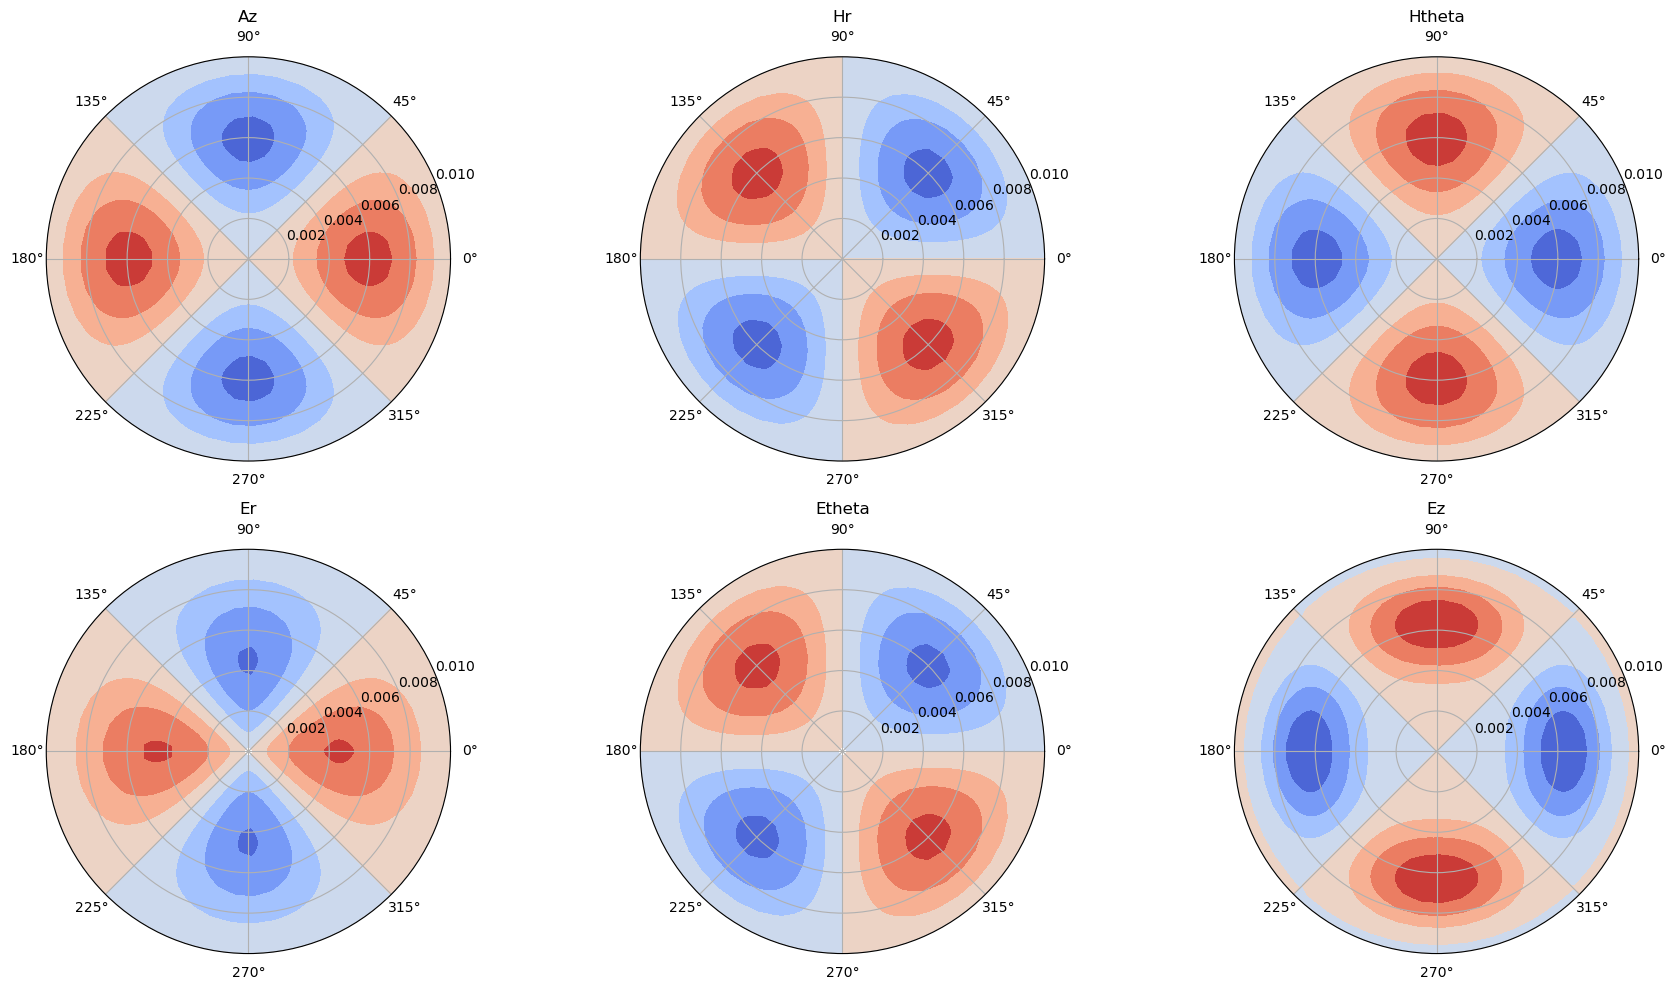

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import cm
from scipy.special import jn, jn_zeros

# Parameters
R = 0.01  # Inner radius of the waveguide (modify as needed)
c = 10  # Depth
m = 2  # TM_mn mode (m is an integer for cylindrical symmetry)
f = 10e9  # Frequency (Hz)
epsilon = 8.854e-12  # Permittivity
mu = 4e-7 * np.pi  # Permeability

# Calculate angular frequency and wave number
omega = 2 * np.pi * f
k = omega * np.sqrt(mu * epsilon)

# Calculate the waveguide mode parameter kc
kc = jn_zeros(m, 1)[0] / R

# Characteristic equation and solve for beta
def char_eqn(beta):
    return (beta**2 - k**2) * epsilon - kc**2

beta = fsolve(char_eqn, 0)[0]

A = 1

# Define field expressions for Az in cylindrical coordinates
def Az(r, theta, z):
    return A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)

# Magnetic field components
def Hr(r, theta, z):
    return -m * A * jn(m, kc * r) * np.sin(m * theta) * np.exp(-1j * beta * z)

def Htheta(r, theta, z):
    return -kc * A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)

def Hz(r, theta, z):
    return np.zeros_like(r)  # Hz is zero in the provided equations

# Electric field components
def Er(r, theta, z):
    return -1j * epsilon * omega * (kc / r) * A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)

def Etheta(r, theta, z):
    return 1j * epsilon * omega * (kc / r) * m * A * r * jn(m, kc * r) * np.sin(m * theta) * np.exp(-1j * beta * z)

def Ez(r, theta, z):
    return -1j * epsilon * omega * A * r**2 * (k**2 * r**2 * jn(m, kc * r).real + kc * r * jn(m, kc * r).imag - m**2 * jn(m, kc * r).real) * np.cos(m * theta) * np.exp(-1j * beta * z)

# Generate polar grid points
Nr, Ntheta, Nz = 50, 50, 50
r = np.linspace(0, R, Nr)
theta = np.linspace(0, 2 * np.pi, Ntheta)
z = np.linspace(0, c, Nz)
R, Theta, Z = np.meshgrid(r, theta, z, indexing='ij')

# Calculate field magnitudes at grid points
az = Az(R, Theta, Z)
hr = Hr(R, Theta, Z)
htheta = Htheta(R, Theta, Z)
hz = Hz(R, Theta, Z)
er = Er(R, Theta, Z)
etheta = Etheta(R, Theta, Z)
ez = Ez(R, Theta, Z)

# Create polar plots for Az, Hr, Htheta, Er, Etheta, Ez
fig, axs = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': 'polar'})

plots = [(az, 'Az'), (hr, 'Hr'), (htheta, 'Htheta'), (er, 'Er'), (etheta, 'Etheta'), (ez, 'Ez')]

for ax, (field, title) in zip(axs.flatten(), plots):
    ax.contourf(Theta[:, :, 33], R[:, :, 33], field[:, :, 33].real, cmap=cm.coolwarm)
    ax.set_title(title)

plt.tight_layout()
plt.show()


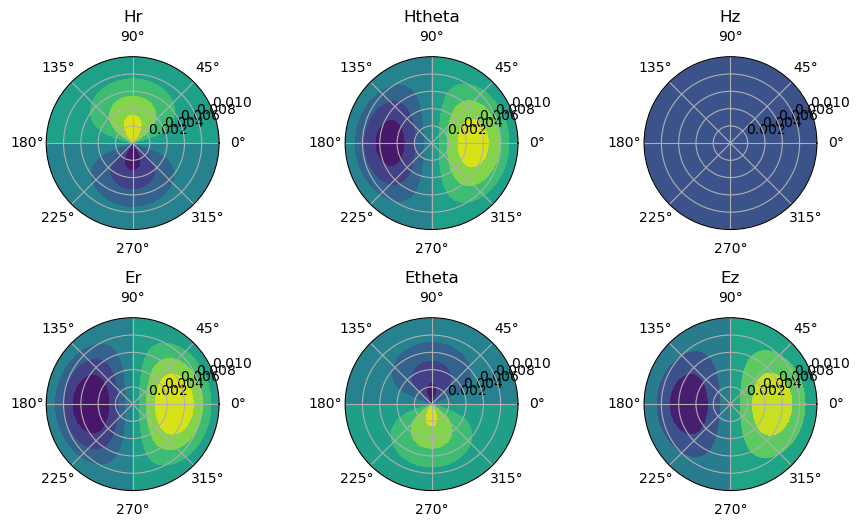

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root
from matplotlib import cm
from scipy.special import jn, jn_zeros

# Parameters
R = 0.01  # Inner radius of the waveguide (modify as needed)
c = 10  # Depth
m = 1 # TM_mn mode (m is an integer for cylindrical symmetry)
f = 8.79e9  # Cut-off frequency for TE11 mode (Hz) - modify as needed
epsilon = 1  # Relative permittivity
mu = 4e-7 * np.pi  # Permeability

# Calculate angular frequency and wave number
omega = 2 * np.pi * f
k = omega * np.sqrt(mu*epsilon)

# Calculate the waveguide mode parameter kc
k_c = jn_zeros(m, 1)[0] / R

def char_eqn_scaled(beta):
    # Scale the equation if necessary
    return (beta**2 - k**2) * epsilon - k_c**2

# beta = fsolve(char_eqn_scaled, 0.1)[0]
result = root(char_eqn_scaled, x0=0.1 ,method='hybr')
beta = result.x[0]

k_g = beta

A = 1

# Define field expressions for Az in cylindrical coordinates
def Az(r, theta, z,t):
    return A * jn(m, k_c * r) * np.cos(m * theta) * np.exp(1j *( beta * z-omega*t))

# Magnetic field components
def Hr(r, theta, z,t):
    return -m * A * (jn(m, k_c * r)/r) * np.sin(m * theta) * np.exp(1j *( beta * z-omega*t))

def Htheta(r, theta, z,t):
    return -k_c * A * jn(m, k_c * r) * np.cos(m * theta) * np.exp(1j *( beta * z-omega*t))

def Hz(r, theta, z,t):
    return np.zeros_like(r)  # Hz is zero in the provided equations

# Electric field components
def Er(r, theta, z,t):
    return -k_g  * (k_c/(epsilon * omega)) * A * jn(m, k_c * r) * np.cos(m * theta) * np.exp(1j *( beta * z-omega*t))

def Etheta(r, theta, z,t):
    return (k_g /(epsilon*omega*r)) * m * A * jn(m, k_c * r) * np.sin(m * theta) * np.exp(1j *( beta * z-omega*t))

def Ez(r, theta, z,t):
    return (-1j * A /(r**2 * epsilon * omega))* (k**2 * r**2 * jn(m, k_c * r).real + k_c * r * jn(m, k_c * r).imag - m**2 * jn(m, k_c * r).real) * np.cos(m * theta) * np.exp(1j *( beta * z-omega*t))

# Generate polar grid points
Nr, Ntheta, Nz,Nt = 50, 50, 50,50
r = np.linspace(0.00001, R, Nr)
theta = np.linspace(0, 2 * np.pi, Ntheta)
z = np.linspace(0, c, Nz)
t = np.linspace(0, 100, Nt)
R, Theta, Z,T = np.meshgrid(r, theta, z,t, indexing='ij')

# Calculate field magnitudes at grid points
er = Hr(R, Theta, Z,T)
etheta = Htheta(R, Theta, Z,T)
ez = Hz(R, Theta, Z,T)
hr = Er(R, Theta, Z,T)
htheta = Etheta(R, Theta, Z,T)
hz = Ez(R, Theta, Z,T)

fig = plt.figure(figsize=(9.1175, 5.3708333333))

ax0 = fig.add_subplot(231, polar=True)
ax1 = fig.add_subplot(232, polar=True)
ax2 = fig.add_subplot(233, polar=True)
ax3 = fig.add_subplot(234, polar=True)
ax4 = fig.add_subplot(235, polar=True)
ax5 = fig.add_subplot(236, polar=True)

# ax0.clear()
ax0.contourf(Theta[:, :, 0,33], R[:, :, 0,33], er[:, :, 0,33].real, cmap=cm.viridis)
ax0.set_title('Hr')

# ax1.clear()
ax1.contourf(Theta[:, :, 0,33], R[:, :, 0,33], etheta[:, :, 0,33].real, cmap=cm.viridis)
ax1.set_title('Htheta')

# ax2.clear()
ax2.contourf(Theta[:, :, 0,33], R[:, :, 0,33], ez[:, :, 0,33].real, cmap=cm.viridis)
ax2.set_title('Hz')

# ax3.clear()
ax3.contourf(Theta[:, :, 0,33], R[:, :, 0,33], hr[:, :, 0,33].real, cmap=cm.viridis)
ax3.set_title('Er')

# ax4.clear()
ax4.contourf(Theta[:, :, 0,33], R[:, :, 0,33], htheta[:, :, 0,33].real, cmap=cm.viridis)
ax4.set_title('Etheta')

# ax5.clear()
ax5.contourf(Theta[:, :, 0,33], R[:, :, 0,33], hz[:, :, 0,33].real, cmap=cm.viridis)
ax5.set_title('Ez')

plt.tight_layout()
plt.show()


C:\Users\abinj\AppData\Local\Temp\ipykernel_13596\2610978380.py:99: RuntimeWarning: divide by zero encountered in divide
  return -1j * epsilon * omega * (kc / r) * A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_13596\2610978380.py:99: RuntimeWarning: invalid value encountered in multiply
  return -1j * epsilon * omega * (kc / r) * A * jn(m, kc * r) * np.cos(m * theta) * np.exp(-1j * beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_13596\2610978380.py:102: RuntimeWarning: divide by zero encountered in divide
  return 1j * epsilon * omega * (kc / r) * m * A * r * jn(m, kc * r) * np.sin(m * theta) * np.exp(-1j * beta * z)
C:\Users\abinj\AppData\Local\Temp\ipykernel_13596\2610978380.py:102: RuntimeWarning: invalid value encountered in multiply
  return 1j * epsilon * omega * (kc / r) * m * A * r * jn(m, kc * r) * np.sin(m * theta) * np.exp(-1j * beta * z)
c:\ProgramData\Anaconda3\envs\dip\lib\site-packages\matplotlib\cbook.p

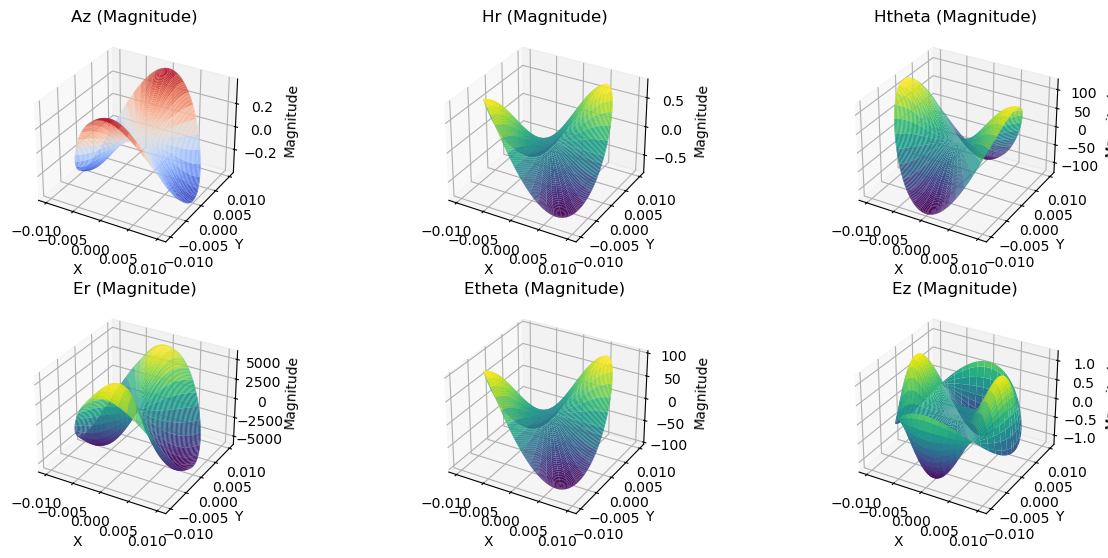

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from matplotlib import cm
from scipy.special import jn, jn_zeros

# Parameters
R = 0.01  # Inner radius of the waveguide (modify as needed)
c = 10  # Depth
m = 2  # TM_mn mode (m is an integer for cylindrical symmetry)
f = 10e9  # Frequency (Hz)
epsilon = 8.854e-12  # Permittivity
mu = 4e-7 * np.pi  # Permeability

# Calculate angular frequency and wave number
omega = 2 * np.pi * f
k = omega * np.sqrt(mu * epsilon)

# Calculate the waveguide mode parameter kc
kc = np.pi / R  # In the absence of jn_zeros, for m=0, kc is simply pi/R

# Characteristic equation and solve for beta
def char_eqn(beta):
    return (beta**2 - k**2) * epsilon - kc**2

beta = np.sqrt(fsolve(char_eqn, 0)[0])

A = 1

# Define polar coordinates for plotting
r = np.linspace(0, R, 100)
theta = np.linspace(0, 2 * np.pi, 100)
r, theta = np.meshgrid(r, theta)

# Evaluate the functions in polar coordinates
az = Az(r, theta, c)  # Depth set to c
hr = Hr(r, theta, c)
htheta = Htheta(r, theta, c)
hz = Hz(r, theta, c)
er = Er(r, theta, c)
etheta = Etheta(r, theta, c)
ez = Ez(r, theta, c)

# Create 3D plots
fig = plt.figure(figsize=(15, 10))

# Plot Az
ax1 = fig.add_subplot(3, 3, 1, projection='3d')
ax1.plot_surface(r * np.cos(theta), r * np.sin(theta), (az), cmap=cm.coolwarm)
ax1.set_title('Az (Magnitude)')

# Plot Hr
ax2 = fig.add_subplot(3, 3, 2, projection='3d')
ax2.plot_surface(r * np.cos(theta), r * np.sin(theta), (hr), cmap=cm.viridis)
ax2.set_title('Hr (Magnitude)')

# Plot Htheta
ax3 = fig.add_subplot(3, 3, 3, projection='3d')
ax3.plot_surface(r * np.cos(theta), r * np.sin(theta), (htheta), cmap=cm.viridis)
ax3.set_title('Htheta (Magnitude)')

# Plot Er
ax4 = fig.add_subplot(3, 3, 4, projection='3d')
ax4.plot_surface(r * np.cos(theta), r * np.sin(theta), (er), cmap=cm.viridis)
ax4.set_title('Er (Magnitude)')

# Plot Etheta
ax5 = fig.add_subplot(3, 3, 5, projection='3d')
ax5.plot_surface(r * np.cos(theta), r * np.sin(theta), (etheta), cmap=cm.viridis)
ax5.set_title('Etheta (Magnitude)')

# Plot Ez
ax6 = fig.add_subplot(3, 3, 6, projection='3d')
ax6.plot_surface(r * np.cos(theta), r * np.sin(theta), (ez), cmap=cm.viridis)
ax6.set_title('Ez (Magnitude)')

# Set common axis labels
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Magnitude')

plt.show()
